Trần Quang Nghĩa

19110392

Lab 04A - Data Mining

# EDA 01

In [1]:
# import basic libraries 
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import plot libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

### Load data and information of the target variable

In [3]:
# Read data
data = pd.read_csv("BigMartSales.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Check for duplicates
idsUnique = len(set(data.Item_Identifier))  # the unique entries
idsTotal = data.shape[0] # a number of entries
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

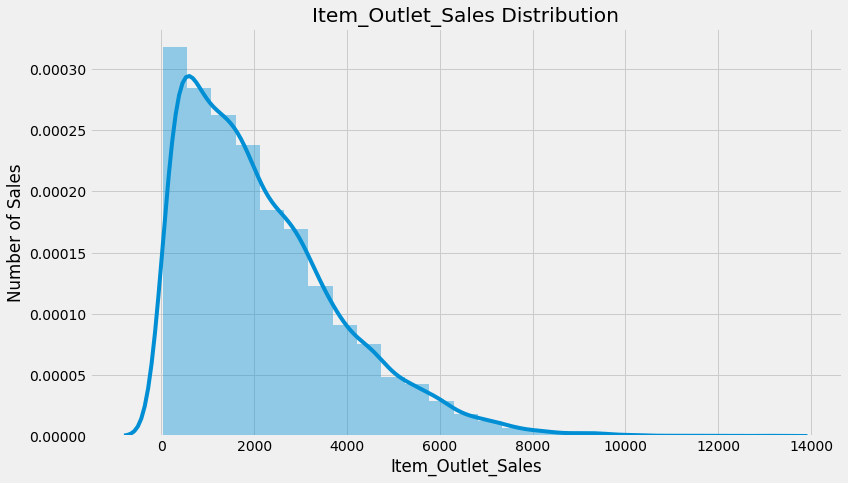

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Item_Outlet_Sales, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

**Comment:**

> Target Variable is skewed to the right

In [8]:
print ("Skew is:", data.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % data.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


### Numeric variables

In [9]:
# Numeric features
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [10]:
# Compute correlation 
corr = numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [11]:
corr.Item_Outlet_Sales.sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.014123
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

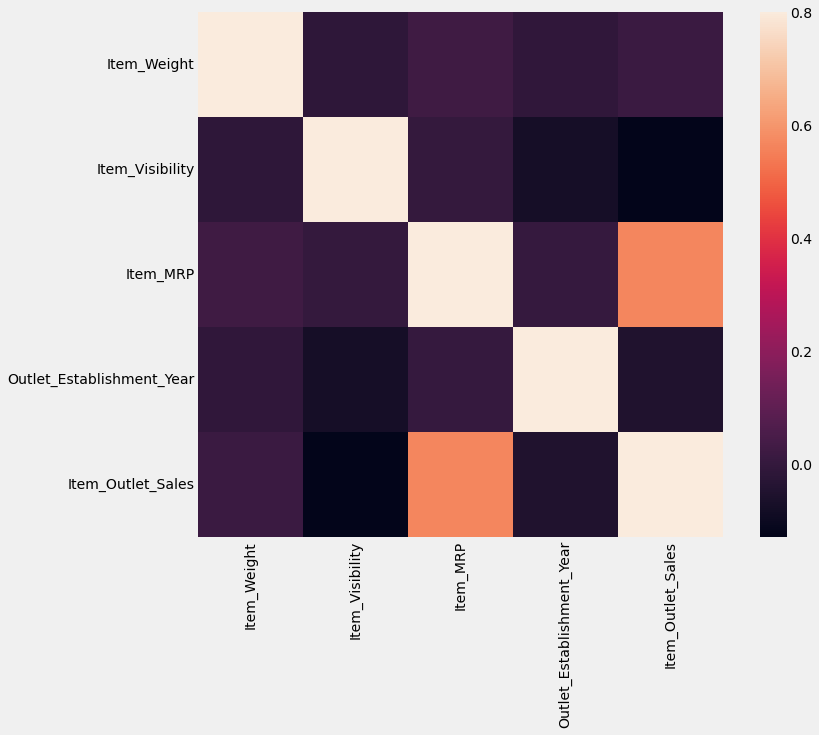

In [12]:
# Correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

**Comment:**

> Item_Visibility is the feature with the lowest correlation with our target variable. Therefore, the less visible the product is in the store, the higher the price will be.

> This feature has a negative correlation with all of the other features and the most positive correlation belongs to Item_MRP.

### Categorical variables

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

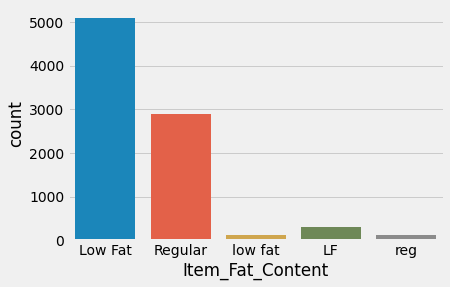

In [13]:
sns.countplot(data.Item_Fat_Content)

**Comment:**

> Low fat = low fat = LF

> Regular = reg

> Factly, It's mean that there are two type of Item_Fat_Content and we have to correct this.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

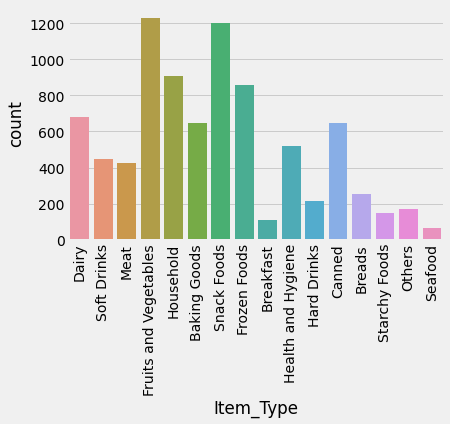

In [14]:
sns.countplot(data.Item_Type)
plt.xticks(rotation=90) 

**Comment:**

> There are 16 types (so high)

> Try to reduce a number of this types 

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

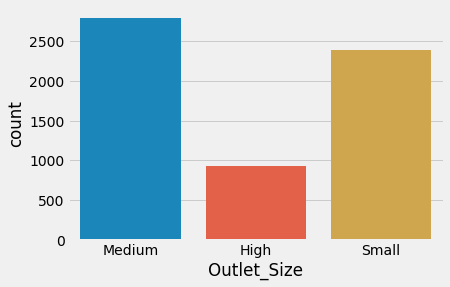

In [15]:
sns.countplot(data.Outlet_Size)

**Comment:**

> Most of existent stores are either "Medium" or "Small".

> There seem to be a low number of stores with "High" size.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

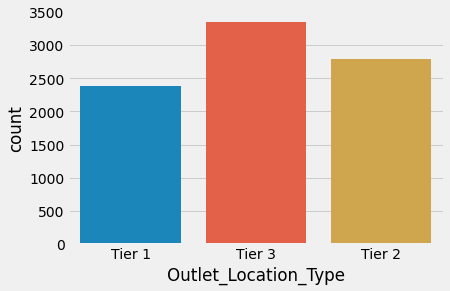

In [16]:
sns.countplot(data.Outlet_Location_Type)

**Comment:**

> Big Mart is located in City tier 3 more than city tier 1 and 2



(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

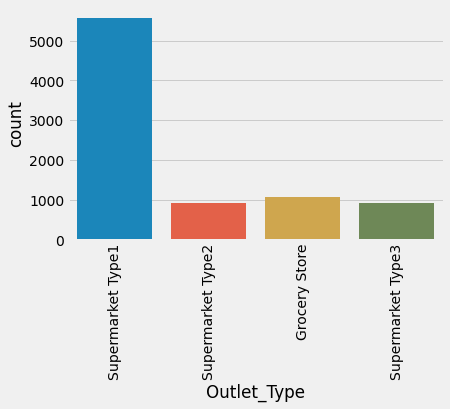

In [17]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)

**Comment:**

> Supermarket Type2 , Grocery Store and Supermarket Type3 all have low expression in this distribution


### Analyze

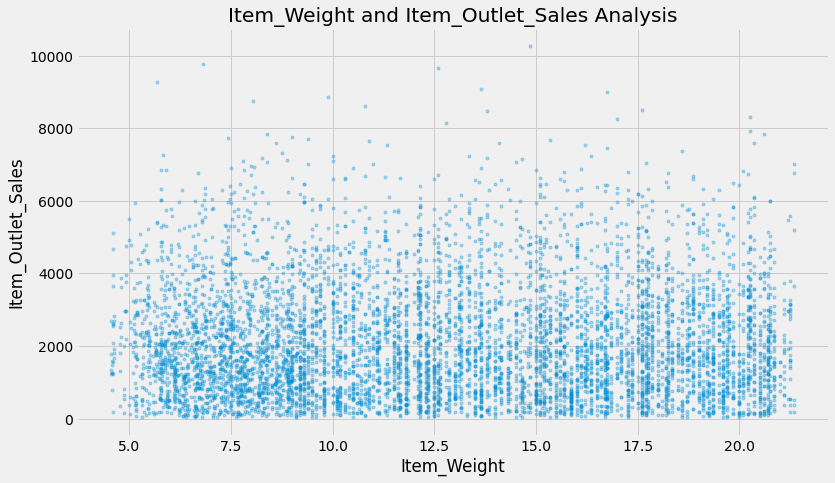

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Weight, data["Item_Outlet_Sales"],'.', alpha = 0.3)

**Comment:**

>  Item_Weight had a low correlation with our target variable

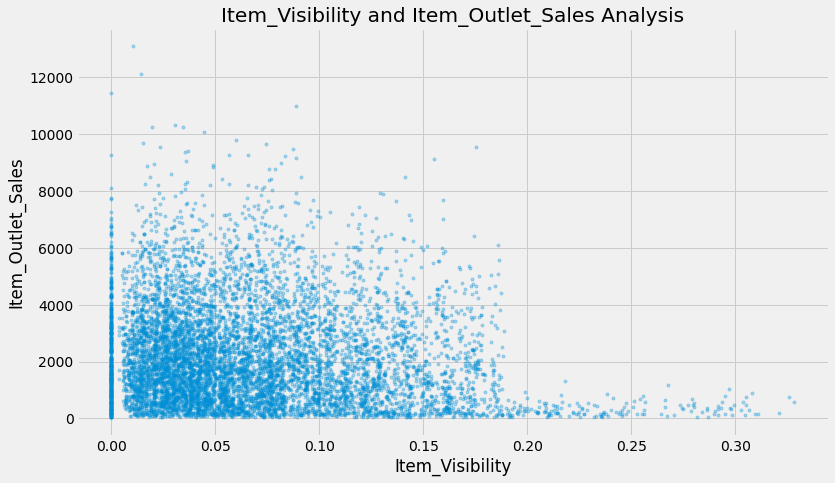

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Visibility, data["Item_Outlet_Sales"],'.', alpha = 0.3)

**Comment:**

> The more visible a product is, the less higher its sales will be

> Visibility in Store: The location of product in a store will impact sales. Ones which are right at the entrance will catch the eye of customer first rather than the ones in back

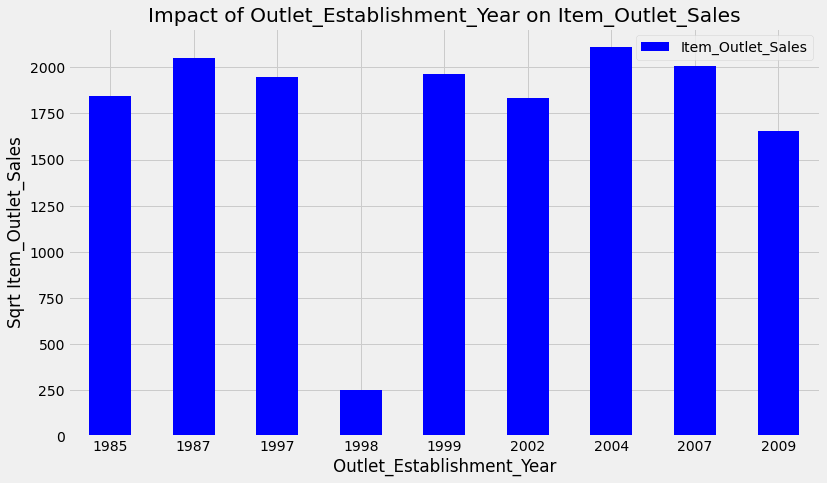

In [20]:
Outlet_Establishment_Year_pivot = \
data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

**Comment:**

> There is no significant meaning between the year of store establishment and the sales for the items

> 1998 has low values might be due to the few store opened in that year

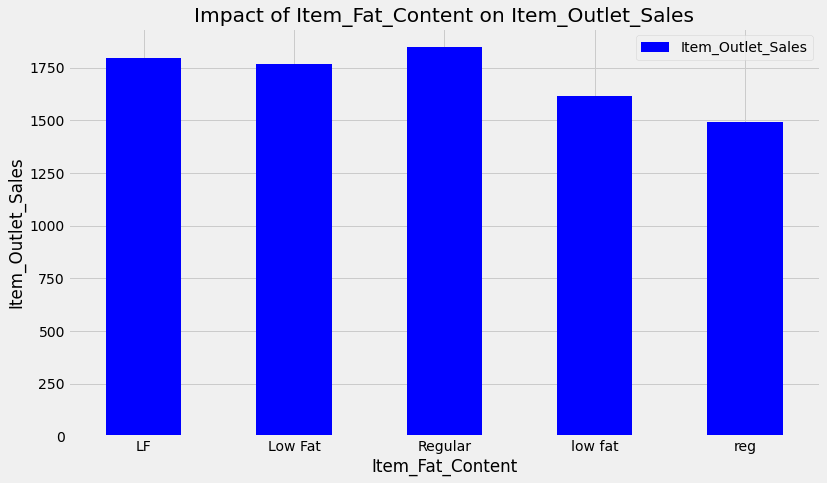

In [21]:
Item_Fat_Content_pivot = \
data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

**Comment:**

> Low Fat” products seem to have higher sales values than “Regular” products.

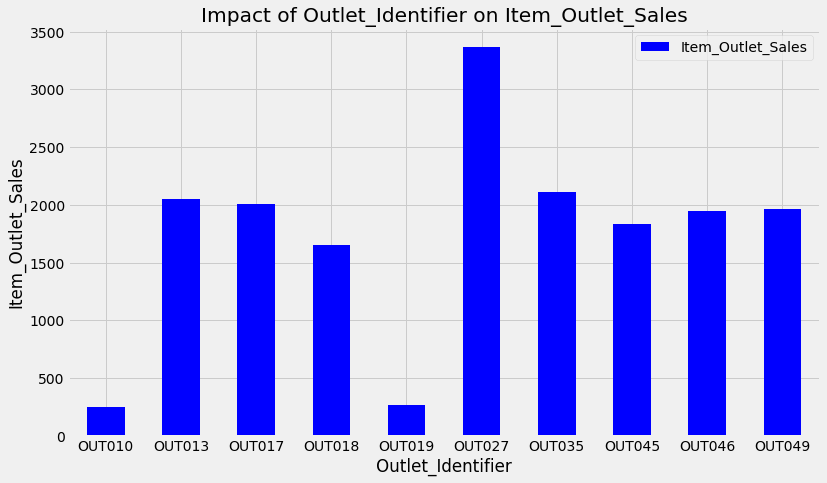

In [22]:
Outlet_Identifier_pivot = \
data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [23]:
data.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [24]:
data.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


**Comment:**

> The groceries (“OUT010”, “OUT019”) have the lowest sales results

> The best results belong to “Out027” which is a “Medium” size Supermarket Type 3

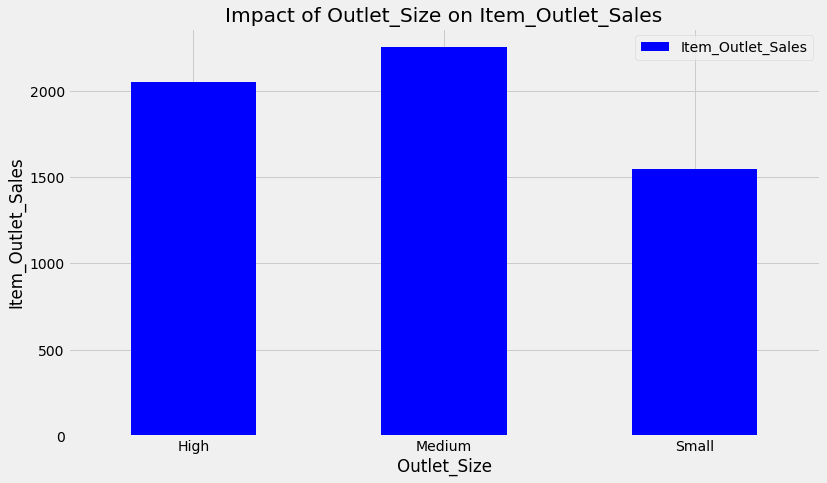

In [25]:
Outlet_Size_pivot = \
data.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

**Comment:**

> Consumers tend to prefer medium size stores instead of big size.

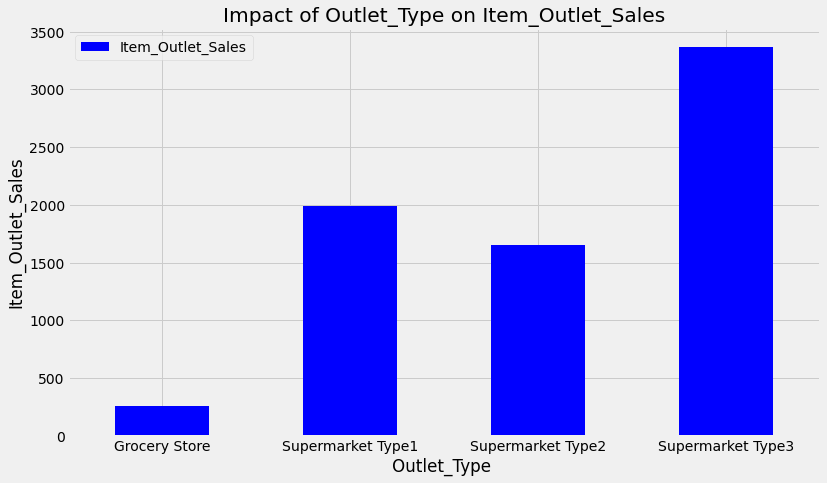

In [26]:
Outlet_Type_pivot = \
data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

**Comment:**

> It would be a good idea to create a new feature that shows the sales ratio according to the store size

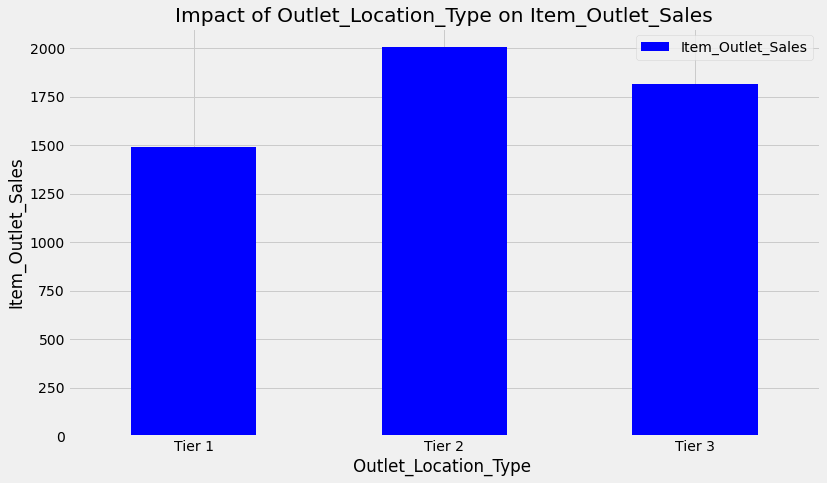

In [27]:
Outlet_Location_Type_pivot = \
data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [28]:
data.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


**Comment:**

> Stores from Tier 2 cities that present the highest results, followed by Tier 3 cities and Tier 1 cities with the lowest results of the three type of locations



**Conclusion:**

In [29]:
# Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [30]:
# aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight.head())

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115


In [31]:
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
data["Item_Weight"] = data["Item_Weight"].fillna(np.nanmedian(data["Item_Weight"]))
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [32]:
# Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


In [33]:
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility']=data['Item_Visibility'].replace(0,data['Item_Visibility'].mean())
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 526
Final #zeros: 0


In [34]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

In [35]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [36]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64


In [37]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       2889
Non-Edible    1599
reg            117
Name: Item_Fat_Content, dtype: int64

In [38]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [39]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [40]:
data.shape

(8523, 36)

In [41]:
# Split Train and Test and check shape 
def SplitTrainAndTest(data, TrainRate, TargetAtt):
    # gets a random TrainDataRate % of the entire set
    training = data.sample(frac=TrainRate, random_state=1)
    # gets the left out portion of the dataset
    testing = data.loc[~data.index.isin(training.index)]

    data_train = training.drop(TargetAtt, 1)
    label_train = training[[TargetAtt]]
    data_test = testing.drop(TargetAtt, 1)
    label_test = testing[[TargetAtt]]

    PrintTrainTestInfo(data_train, label_train, data_test, label_test)
    return data_train, label_train, data_test, label_test
    
def PrintTrainTestInfo(data_train, label_train, data_test, label_test):
  print("Train shape : ", data_train.shape)
  print("Test shape : ", data_test.shape)

In [42]:
from sklearn.preprocessing import LabelEncoder
EncoderAttList = ["Item_Type"]

data_encoder = data.copy()
for att in EncoderAttList:
  data_encoder[att] = LabelEncoder().fit_transform(data_encoder[att])

data_encoder = data_encoder.drop(['Item_Identifier', 'Outlet_Identifier'], 1)  

display(data_encoder.info())
display(data_encoder.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   int32  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Item_Outlet_Sales          8523 non-null   float64
 6   Outlet_Years               8523 non-null   int64  
 7   Item_Fat_Content_0         8523 non-null   uint8  
 8   Item_Fat_Content_1         8523 non-null   uint8  
 9   Item_Fat_Content_2         8523 non-null   uint8  
 10  Item_Fat_Content_3         8523 non-null   uint8  
 11  Outlet_Location_Type_0     8523 non-null   uint8  
 12  Outlet_Location_Type_1     8523 non-null   uint8  
 13  Outlet_Location_Type_2     8523 non-null   uint8

None

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,0.016047,4,249.8092,1999,3735.1380,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,14,48.2692,2009,443.4228,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,10,141.6180,1999,2097.2700,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.066132,6,182.0950,1998,732.3800,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.066132,9,53.8614,1987,994.7052,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5,10.395,0.066132,0,51.4008,2009,556.6088,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,13.650,0.012741,13,57.6588,1987,343.5528,26,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,12.600,0.127470,13,107.7622,1985,4022.7636,28,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,16.200,0.016687,5,96.9726,2002,1076.5986,11,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,19.200,0.094450,5,187.8214,2007,4710.5350,6,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [43]:
data_train, label_train, data_test, label_test = SplitTrainAndTest(data_encoder, 0.7, 'Item_Outlet_Sales')
FeatureList = data_train.columns.to_list()
TargetAtt = 'Item_Outlet_Sales'
print(FeatureList)

Train shape :  (5966, 33)
Test shape :  (2557, 33)
['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Fat_Content_3', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

LRModel = LinearRegression(normalize=True)
Model = LRModel

Model.fit(data_train[FeatureList], label_train)
# model evaluation for training set
label_train_predict = Model.predict(data_train[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
r2 = r2_score(label_train, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = Model.predict(data_test[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
r2 = r2_score(label_test, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1120.7945047421706
R2 score is 0.5649956108837578


The model performance for testing set
--------------------------------------
RMSE is 1144.406546595876
R2 score is 0.5587119768566415




In [45]:
PredictDF = data_test[FeatureList].copy()
PredictDF[TargetAtt] = label_test
PredictDF["Predict"] = label_test_predict
PredictDF = PredictDF.reset_index(drop=False)

display(PredictDF.head())

,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales,Predict
0,0,9.30,0.016047,4,249.8092,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,3735.1380,4008.0
1,2,17.50,0.016760,10,141.6180,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,2097.2700,2336.0
2,8,16.20,0.016687,5,96.9726,2002,11,0,0,1,...,0,0,0,0,0,1,0,0,1076.5986,1608.0
3,14,16.35,0.068024,6,196.4426,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,1977.4260,3152.0
4,15,9.00,0.069089,2,56.3614,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,1547.3192,952.0


In [46]:
from sklearn.tree import DecisionTreeRegressor
DTModel = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
Model = DTModel

Model.fit(data_train[FeatureList], label_train)
# model evaluation for training set
label_train_predict = Model.predict(data_train[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
r2 = r2_score(label_train, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = Model.predict(data_test[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
r2 = r2_score(label_test, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1059.6692730036987
R2 score is 0.6111497918107782


The model performance for testing set
--------------------------------------
RMSE is 1102.0288371483964
R2 score is 0.590788913298389




In [47]:
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_leaf=150, random_state=123)
Model = RFModel

Model.fit(data_train[FeatureList], label_train)
# model evaluation for training set
label_train_predict = Model.predict(data_train[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
r2 = r2_score(label_train, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = Model.predict(data_test[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
r2 = r2_score(label_test, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1082.7748756313142
R2 score is 0.5940075166392311


The model performance for testing set
--------------------------------------
RMSE is 1100.4067209004963
R2 score is 0.5919926920080002




In [48]:
def XGBRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from xgboost import XGBRegressor

  XGBModel = XGBRegressor()
  XGBModel.fit(data_train[FeatureList], label_train)

  # model evaluation for training set
  label_train_predict = XGBModel.predict(data_train[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
  r2 = r2_score(label_train, label_train_predict)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  label_test_predict = XGBModel.predict(data_test[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
  r2 = r2_score(label_test, label_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  PredictDF = data_test[FeatureList].copy()
  PredictDF[TargetAtt] = label_test
  PredictDF["Predict"] = label_test_predict
  PredictDF = PredictDF.reset_index(drop=False)

  print("The the predict table result : ")
  print("--------------------------------------")
  display(PredictDF.head(10))
  
  return XGBModel, PredictDF

def PredictXGBRegressor(XGBModel, FeatureSample, TrueLabel = ""):
  if isinstance(FeatureSample, pd.Series):
    FeatureSample = [FeatureSample]
  
  print(FeatureSample)

  label_predict = XGBModel.predict(FeatureSample)
  
  
  DirectPredictDF = FeatureSample.copy()
  DirectPredictDF["LabelTest"] = list(TrueLabel)
  DirectPredictDF["Predict"] = label_predict
  DirectPredictDF = DirectPredictDF.reset_index(drop=False)
  
  print("\n")
  print("The the predict table result : ")
  print("--------------------------------------")
  display(DirectPredictDF.head(10))
  
  return DirectPredictDF

In [49]:
XGBModel, PredictDF = XGBRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt)

The model performance for training set
--------------------------------------
RMSE is 614.2910013938961
R2 score is 0.869325766888164


The model performance for testing set
--------------------------------------
RMSE is 1171.3830322237602
R2 score is 0.5376622754397132


The the predict table result : 
--------------------------------------


,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales,Predict
0,0,9.30,0.016047,4,249.8092,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,3735.1380,5199.931641
1,2,17.50,0.016760,10,141.6180,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,2097.2700,2229.471436
2,8,16.20,0.016687,5,96.9726,2002,11,0,0,1,...,0,0,0,0,0,1,0,0,1076.5986,1764.608398
3,14,16.35,0.068024,6,196.4426,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,1977.4260,2346.938965
4,15,9.00,0.069089,2,56.3614,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,1547.3192,725.533508
5,18,12.60,0.034238,7,113.2834,1985,28,1,0,0,...,0,0,0,1,0,0,0,0,2303.6680,3425.846924
6,20,18.85,0.138190,13,250.8724,1987,26,0,0,1,...,0,0,0,0,0,0,0,0,3775.0860,3316.099121
7,23,12.60,0.057557,0,107.6938,1985,28,1,0,0,...,0,0,1,0,0,0,0,0,214.3876,-0.501701
8,24,13.85,0.025896,5,165.0210,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,4078.0250,2508.994141
9,27,11.65,0.019356,7,39.1164,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,308.9312,505.168121


In [50]:
def LGBMRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import lightgbm as lgb

  LGBMModel = lgb.LGBMRegressor()
  LGBMModel.fit(data_train[FeatureList], label_train)

  # model evaluation for training set
  label_train_predict = LGBMModel.predict(data_train[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
  r2 = r2_score(label_train, label_train_predict)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  label_test_predict = LGBMModel.predict(data_test[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
  r2 = r2_score(label_test, label_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  PredictDF = data_test[FeatureList].copy()
  PredictDF[TargetAtt] = label_test
  PredictDF["Predict"] = label_test_predict
  PredictDF = PredictDF.reset_index(drop=False)

  print("The the predict table result : ")
  print("--------------------------------------")
  display(PredictDF.head(10))
  
  return LGBMModel, PredictDF

def PredictLGBMRegressor(LGBMModel, FeatureSample, TrueLabel = ""):
  if isinstance(FeatureSample, pd.Series):
    FeatureSample = [FeatureSample]
  
  print(FeatureSample)

  label_predict = LGBMModel.predict(FeatureSample)
  
  
  DirectPredictDF = FeatureSample.copy()
  DirectPredictDF["LabelTest"] = list(TrueLabel)
  DirectPredictDF["Predict"] = label_predict
  DirectPredictDF = DirectPredictDF.reset_index(drop=False)
  
  print("\n")
  print("The the predict table result : ")
  print("--------------------------------------")
  display(DirectPredictDF.head(10))
  
  return DirectPredictDF

In [51]:
LGBMModel, PredictDF = LGBMRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt)

The model performance for training set
--------------------------------------
RMSE is 875.1532362733374
R2 score is 0.7347778084691572


The model performance for testing set
--------------------------------------
RMSE is 1103.7693069878824
R2 score is 0.5894953319581073


The the predict table result : 
--------------------------------------


,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales,Predict
0,0,9.30,0.016047,4,249.8092,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,3735.1380,4359.689835
1,2,17.50,0.016760,10,141.6180,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,2097.2700,2058.257360
2,8,16.20,0.016687,5,96.9726,2002,11,0,0,1,...,0,0,0,0,0,1,0,0,1076.5986,1501.331377
3,14,16.35,0.068024,6,196.4426,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,1977.4260,2938.880478
4,15,9.00,0.069089,2,56.3614,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,1547.3192,843.346755
5,18,12.60,0.034238,7,113.2834,1985,28,1,0,0,...,0,0,0,1,0,0,0,0,2303.6680,3256.516532
6,20,18.85,0.138190,13,250.8724,1987,26,0,0,1,...,0,0,0,0,0,0,0,0,3775.0860,3361.693777
7,23,12.60,0.057557,0,107.6938,1985,28,1,0,0,...,0,0,1,0,0,0,0,0,214.3876,245.229397
8,24,13.85,0.025896,5,165.0210,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,4078.0250,2732.693556
9,27,11.65,0.019356,7,39.1164,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,308.9312,526.094768
